In [1]:
%load_ext autoreload
%autoreload 2

from run_models import load_model
from plot_utils import *
from DisruptionPredictors import DisruptionPredictorSM, DisruptionPredictorRF, DisruptionPredictorTinguely
from Experiments import Experiment
from plot_experiments import *

horizons = np.linspace(0.001, 0.3, 11)
coarse_thresholds = np.linspace(0, 1, 11)

device = 'cmod'
#dataset = 'random100'
dataset = 'random_256_shots_60%_flattop'
test_dataset = dataset+'_test'

dataset_5k = '5k_random_256_shots_60%_flattop'
test_dataset_5k = dataset_5k+'_test'

dataset_20k = '20k_random_256_shots_60%_flattop'
test_dataset_20k = dataset_20k+'_test'

#temporal_dataset = '5k_random_256_shots_60%_flattop'
#test_temporal_dataset = temporal_dataset+'_test'

# Load models and create disruption predictors

cph_model, cph_transformer, cph_features = load_model('cph', device, dataset)
cph_predictor = DisruptionPredictorSM("Cox Proportional Hazards", cph_model, cph_features, cph_transformer)

cph_model_5k, cph_transformer, cph_features = load_model('cph', device, dataset_5k)
cph_predictor_5k = DisruptionPredictorSM("Cox Proportional Hazards 5k", cph_model_5k, cph_features, cph_transformer)

cph_model_20k, cph_transformer, cph_features = load_model('cph', device, dataset_20k)
cph_predictor_20k = DisruptionPredictorSM("Cox Proportional Hazards 20k", cph_model_20k, cph_features, cph_transformer)

dcph_model, dcph_transformer, dcph_features = load_model('dcph', device, dataset)
dcph_predictor = DisruptionPredictorSM("Deep Cox Proportional Hazards", dcph_model, dcph_features, dcph_transformer)

dcph_model_5k, dcph_transformer, dcph_features = load_model('dcph', device, dataset_5k)
dcph_predictor_5k = DisruptionPredictorSM("Deep Cox Proportional Hazards 5k", dcph_model_5k, dcph_features, dcph_transformer)

dcph_model_20k, dcph_transformer, dcph_features = load_model('dcph', device, dataset_20k)
dcph_predictor_20k = DisruptionPredictorSM("Deep Cox Proportional Hazards 20k", dcph_model_20k, dcph_features, dcph_transformer)

dcm_model, dcm_transformer, dcm_features = load_model('dcm', device, dataset)
dcm_predictor = DisruptionPredictorSM("Deep Cox Mixture", dcm_model, dcm_features, dcm_transformer)

dsm_model, dsm_transformer, dsm_features = load_model('dsm', device, dataset)
dsm_predictor = DisruptionPredictorSM("Deep Survival Machines", dsm_model, dsm_features, dsm_transformer)

dsm_model_5k, dsm_transformer, dsm_features = load_model('dsm', device, dataset_5k)
dsm_predictor_5k = DisruptionPredictorSM("Deep Survival Machines 5k", dsm_model_5k, dsm_features, dsm_transformer)

dsm_model_20k, dsm_transformer, dsm_features = load_model('dsm', device, dataset_20k)
dsm_predictor_20k = DisruptionPredictorSM("Deep Survival Machines 20k", dsm_model_20k, dsm_features, dsm_transformer)

#rsf_model, rsf_transformer, rsf_features = load_model('rsf', device, dataset)
#rsf_predictor = DisruptionPredictorSM("Random Survival Forest", rsf_model, rsf_features, rsf_transformer)

rf_model, rf_transformer, rf_features = load_model('rf', device, dataset)
rf_predictor = DisruptionPredictorRF("Random Forest", rf_model, rf_features, rf_transformer)

rf_model_5k, rf_transformer, rf_features = load_model('rf', device, dataset_5k)
rf_predictor_5k = DisruptionPredictorRF("Random Forest 5k", rf_model_5k, rf_features, rf_transformer)

rf_model_20k, rf_transformer, rf_features = load_model('rf', device, dataset_20k)
rf_predictor_20k = DisruptionPredictorRF("Random Forest 20k", rf_model_20k, rf_features, rf_transformer)

ting_model, ting_transformer, ting_features = load_model('rf', device, dataset)
ting_predictor = DisruptionPredictorTinguely("Tinguely et al. 2019", ting_model, ting_features, ting_transformer)

ting_model_5k, ting_transformer, ting_features = load_model('rf', device, dataset_5k)
ting_predictor_5k = DisruptionPredictorTinguely("Tinguely et al. 2019 5k", ting_model_5k, ting_features, ting_transformer)

ting_model_20k, ting_transformer, ting_features = load_model('rf', device, dataset_20k)
ting_predictor_20k = DisruptionPredictorTinguely("Tinguely et al. 2019 20k", ting_model_20k, ting_features, ting_transformer)

# Create experiments for each predictor
cph_experiment = Experiment(device, test_dataset, cph_predictor, 'CPH')
cph_experiment_5k = Experiment(device, test_dataset_5k, cph_predictor_5k, 'CPH 5k')
cph_experiment_20k = Experiment(device, test_dataset_20k, cph_predictor_20k, 'CPH 20k')
dcph_experiment = Experiment(device, test_dataset, dcph_predictor, 'DCPH')
dcph_experiment_5k = Experiment(device, test_dataset_5k, dcph_predictor, 'DCPH 5k')
dcph_experiment_20k = Experiment(device, test_dataset_20k, dcph_predictor, 'DCPH 20k')
dcm_experiment = Experiment(device, test_dataset, dcm_predictor, 'DCM')
dcm_experiment_5k = Experiment(device, test_dataset_5k, dcm_predictor, 'DCM 5k')
#dcm_experiment_20k = Experiment(device, test_dataset_20k, dcm_predictor, 'DCM 20k')
dsm_experiment = Experiment(device, test_dataset, dsm_predictor, 'DSM')
dsm_experiment_5k = Experiment(device, test_dataset_5k, dsm_predictor, 'DSM 5k')
dsm_experiment_20k = Experiment(device, test_dataset_20k, dsm_predictor, 'DSM 20k')
#rsf_experiment = Experiment(device, test_dataset, rsf_predictor, 'RSF')
rf_experiment = Experiment(device, test_dataset, rf_predictor, 'RF')
rf_experiment_5k = Experiment(device, test_dataset_5k, rf_predictor, 'RF 5k')
rf_experiment_20k = Experiment(device, test_dataset_20k, rf_predictor, 'RF 20k')
ting_experiment = Experiment(device, test_dataset, ting_predictor, 'Tinguely')
ting_experiment_5k = Experiment(device, test_dataset_5k, ting_predictor, 'Tinguely 5k')
ting_experiment_20k = Experiment(device, test_dataset_20k, ting_predictor, 'Tinguely 20k')


Loaded model from models/cph_cmod_random_256_shots_60%_flattop.pkl
Loaded model from models/cph_cmod_5k_random_256_shots_60%_flattop.pkl
Loaded model from models/cph_cmod_20k_random_256_shots_60%_flattop.pkl
Loaded model from models/dcph_cmod_random_256_shots_60%_flattop.pkl
Loaded model from models/dcph_cmod_5k_random_256_shots_60%_flattop.pkl
Loaded model from models/dcph_cmod_20k_random_256_shots_60%_flattop.pkl
Loaded model from models/dcm_cmod_random_256_shots_60%_flattop.pkl
Loaded model from models/dsm_cmod_random_256_shots_60%_flattop.pkl
Loaded model from models/dsm_cmod_5k_random_256_shots_60%_flattop.pkl
Loaded model from models/dsm_cmod_20k_random_256_shots_60%_flattop.pkl
Loaded model from models/rf_cmod_random_256_shots_60%_flattop.pkl
Loaded model from models/rf_cmod_5k_random_256_shots_60%_flattop.pkl
Loaded model from models/rf_cmod_20k_random_256_shots_60%_flattop.pkl
Loaded model from models/rf_cmod_random_256_shots_60%_flattop.pkl
Loaded model from models/rf_cmod_5k

c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\Experiments.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.all_data[predictor.features] = feature_data
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\Experiments.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.all_data[predictor.features] = feature_data
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\Experiments.py:36: PerformanceWarning: DataFrame is highly fragmented.  Thi

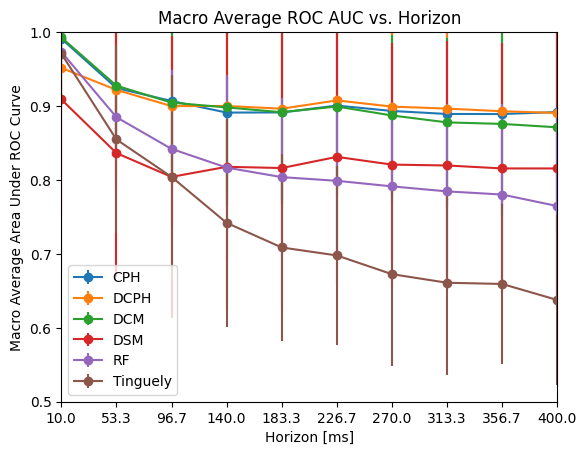

In [17]:
# Run the experiments
core_experiment_list = [cph_experiment, dcph_experiment, dcm_experiment, dsm_experiment, rf_experiment, ting_experiment]

cph_list = [cph_experiment, cph_experiment_5k, cph_experiment_20k]
dcph_list = [dcph_experiment, dcph_experiment_5k, dcph_experiment_20k]
dcm_list = [dcm_experiment, dcm_experiment_5k]
dsm_list = [dsm_experiment, dsm_experiment_5k, dsm_experiment_20k]
rf_list = [rf_experiment, rf_experiment_5k, rf_experiment_20k]
ting_list = [ting_experiment, ting_experiment_5k, ting_experiment_20k]

#experiment_list = [ting_experiment]
#experiment_list = [cph_experiment, cph_temporal_experiment]
plot_roc_auc_vs_horizon_macro(core_experiment_list)
#plot_roc_auc_vs_horizon_macro(cph_list)
#plot_roc_auc_vs_horizon_macro(dcph_list)
#plot_roc_auc_vs_horizon_macro(dcm_list)
#plot_roc_auc_vs_horizon_macro(dsm_list)
#plot_roc_auc_vs_horizon_macro(rf_list)
#plot_roc_auc_vs_horizon_macro(ting_list)



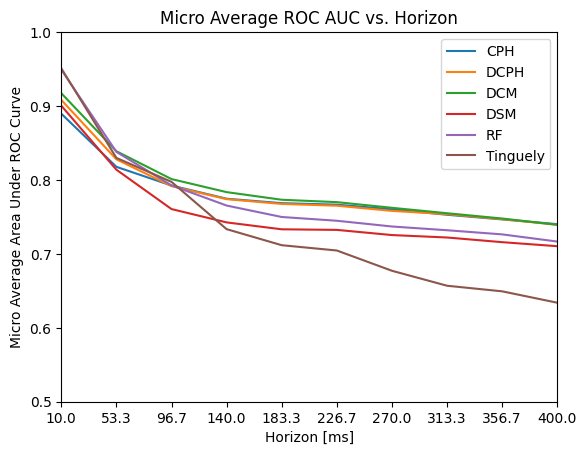

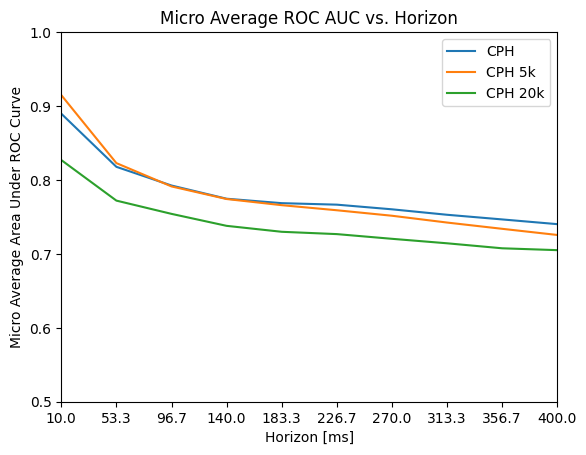

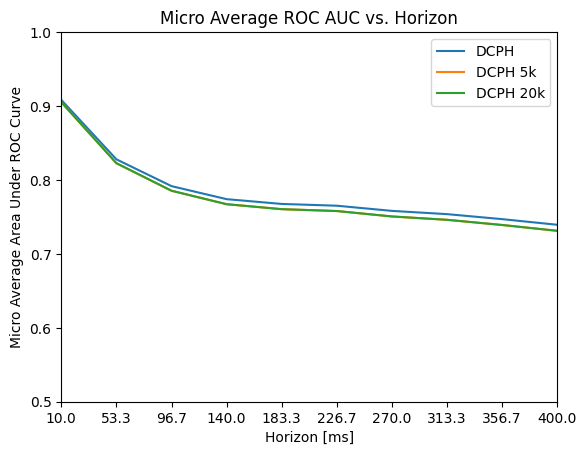

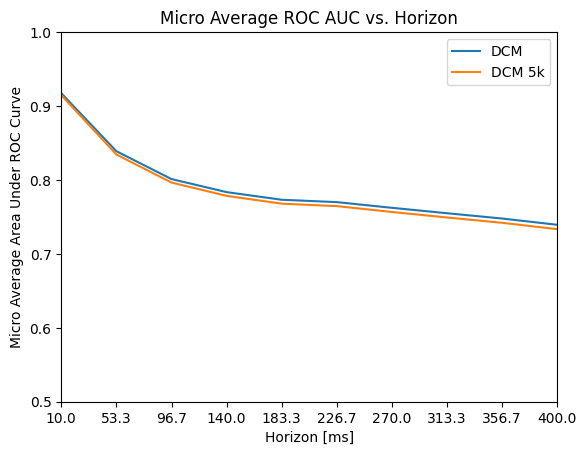

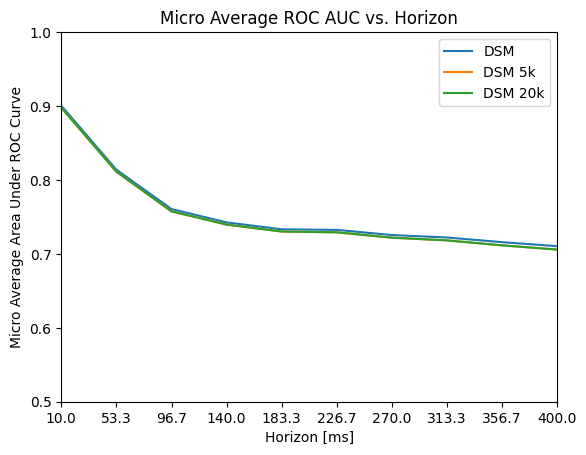

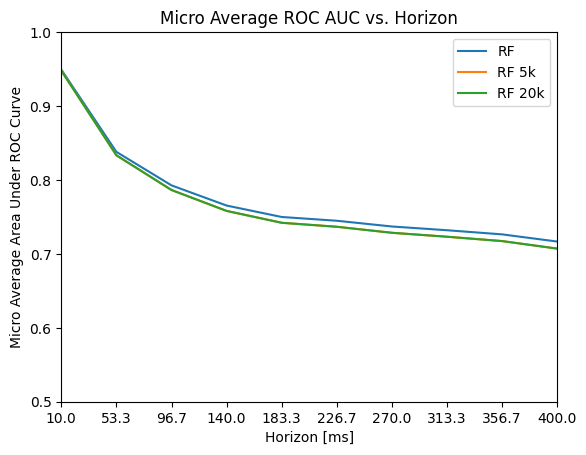

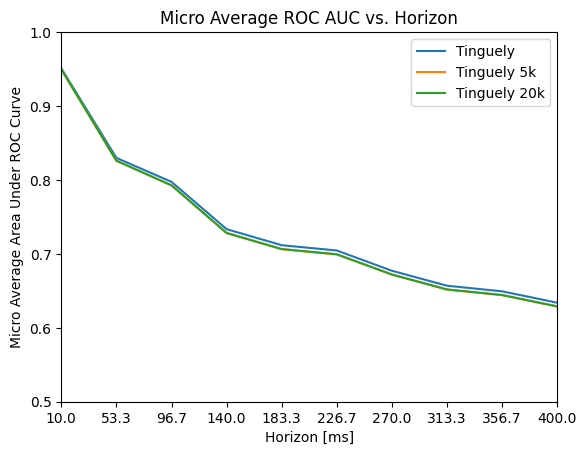

In [10]:
plot_roc_auc_vs_horizon_micro(core_experiment_list)
plot_roc_auc_vs_horizon_micro(cph_list)
plot_roc_auc_vs_horizon_micro(dcph_list)
plot_roc_auc_vs_horizon_micro(dcm_list)
plot_roc_auc_vs_horizon_micro(dsm_list)
plot_roc_auc_vs_horizon_micro(rf_list)
plot_roc_auc_vs_horizon_micro(ting_list)

In [ ]:
#for experiment in experiment_list:
#    plot_risk_compare_horizons(experiment, experiment.get_disruptive_shot_list()[1])

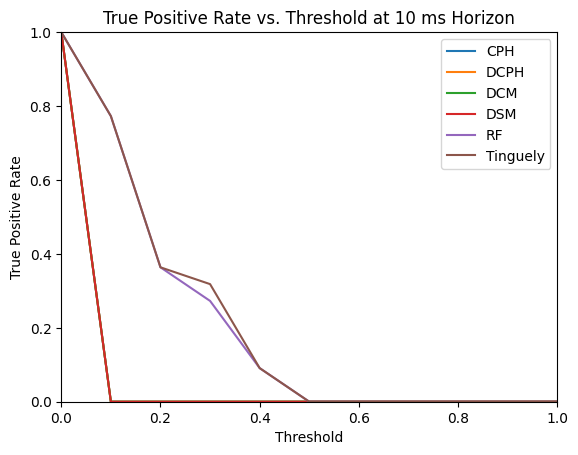

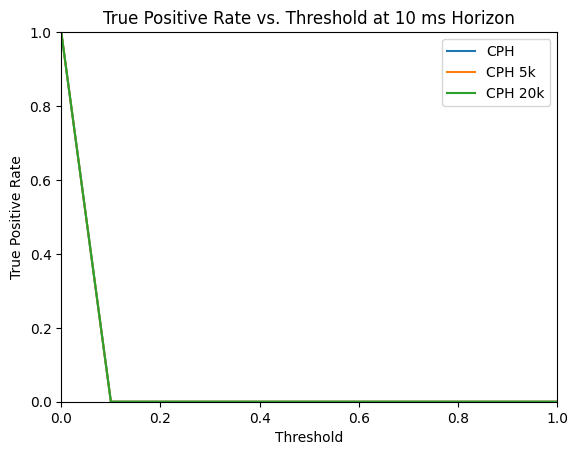

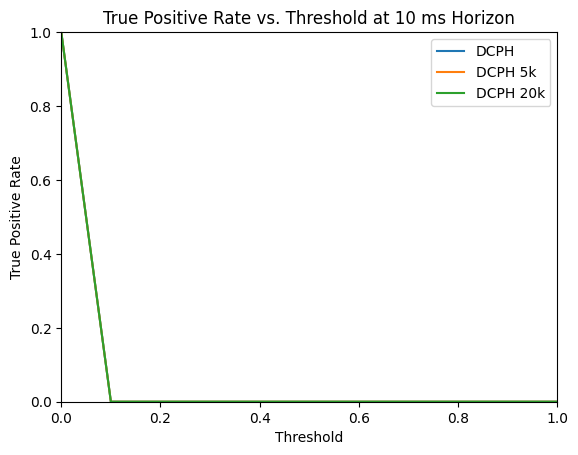

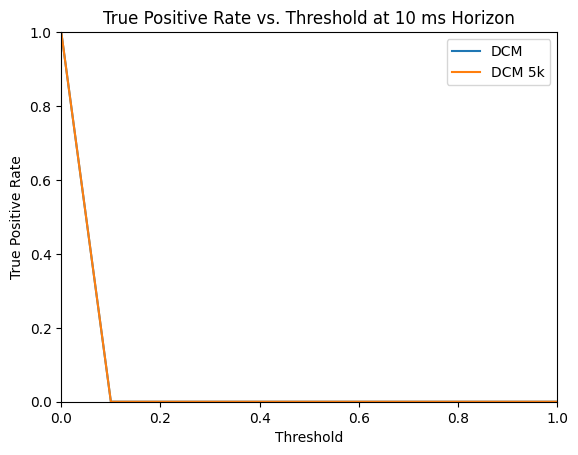

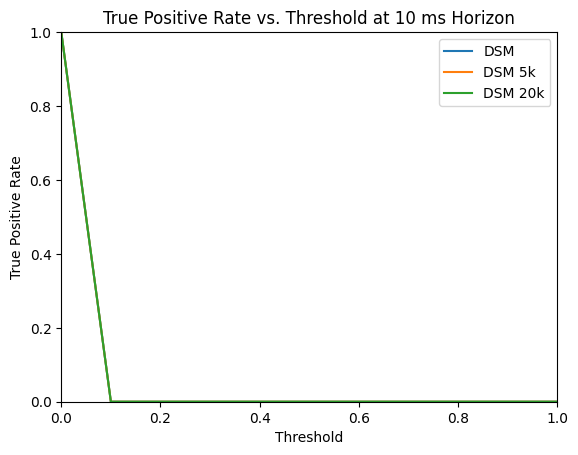

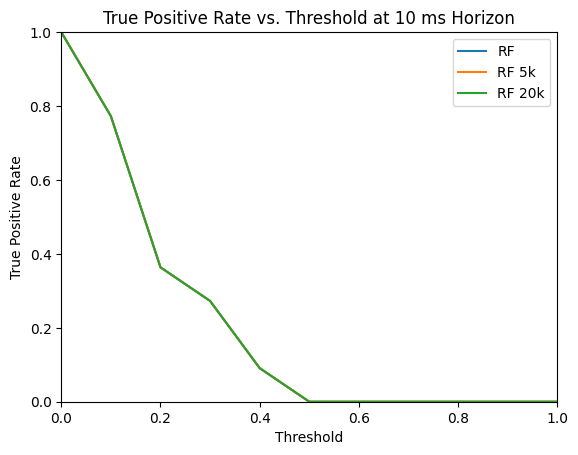

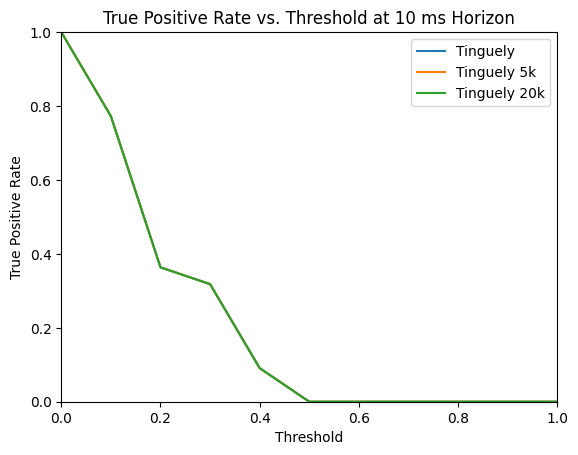

In [11]:
plot_TPR_vs_threshold_macro(core_experiment_list, coarse_thresholds)
plot_TPR_vs_threshold_macro(cph_list, coarse_thresholds)
plot_TPR_vs_threshold_macro(dcph_list, coarse_thresholds)
plot_TPR_vs_threshold_macro(dcm_list, coarse_thresholds)
plot_TPR_vs_threshold_macro(dsm_list, coarse_thresholds)
plot_TPR_vs_threshold_macro(rf_list, coarse_thresholds)
plot_TPR_vs_threshold_macro(ting_list, coarse_thresholds)

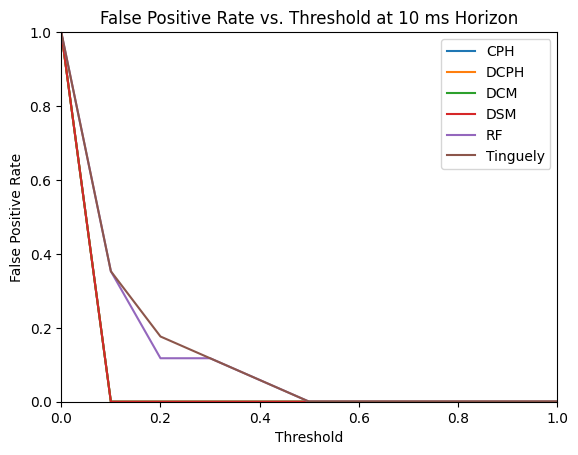

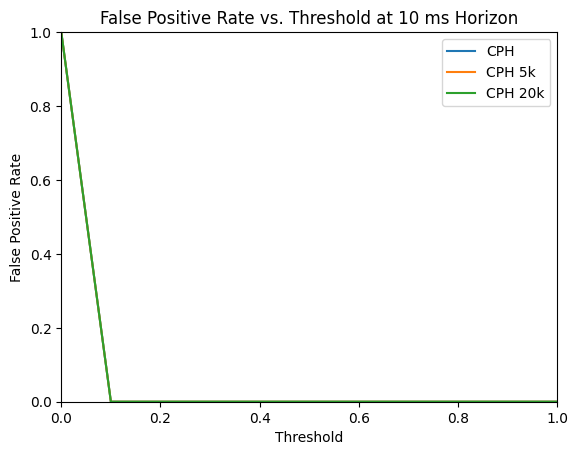

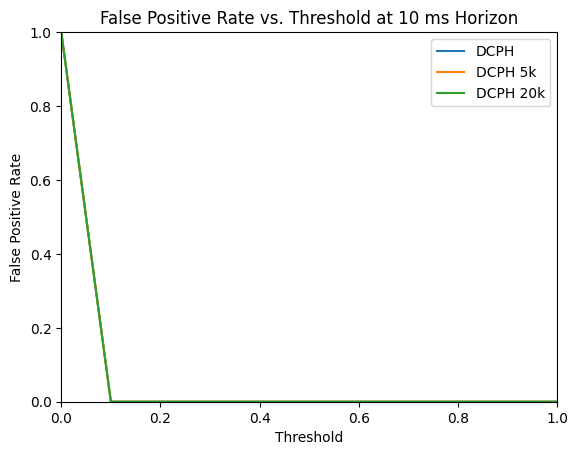

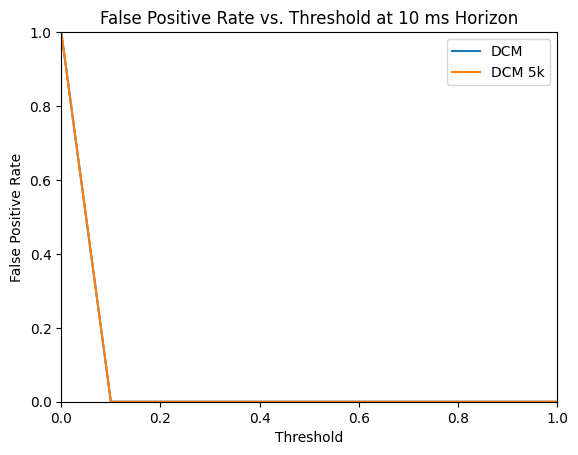

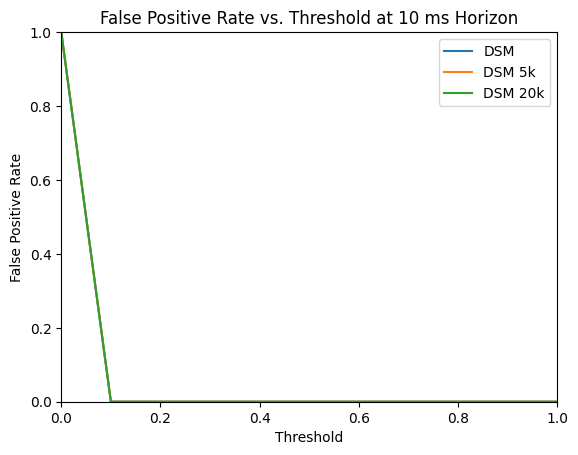

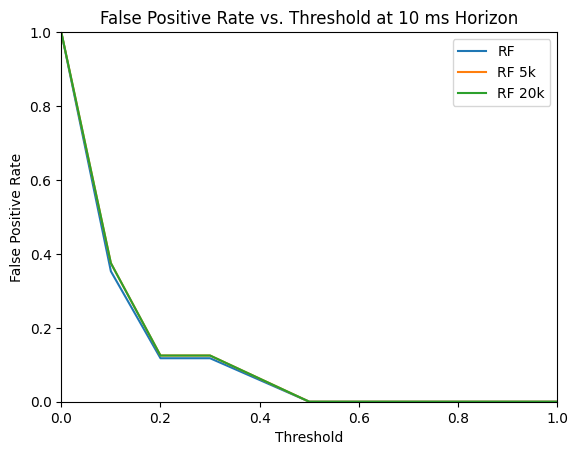

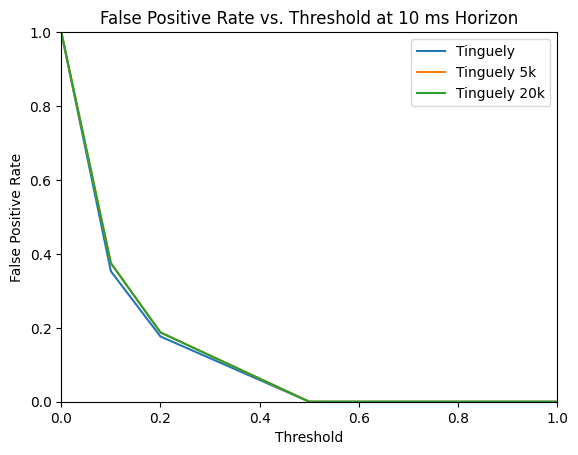

In [12]:
plot_FPR_vs_threshold_macro(core_experiment_list, coarse_thresholds)
plot_FPR_vs_threshold_macro(cph_list, coarse_thresholds)
plot_FPR_vs_threshold_macro(dcph_list, coarse_thresholds)
plot_FPR_vs_threshold_macro(dcm_list, coarse_thresholds)
plot_FPR_vs_threshold_macro(dsm_list, coarse_thresholds)
plot_FPR_vs_threshold_macro(rf_list, coarse_thresholds)
plot_FPR_vs_threshold_macro(ting_list, coarse_thresholds)

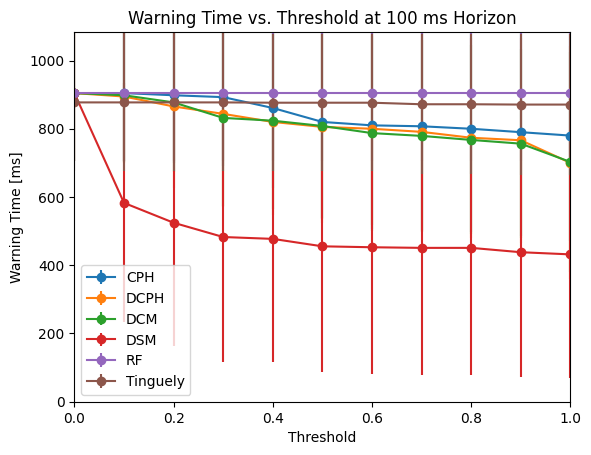

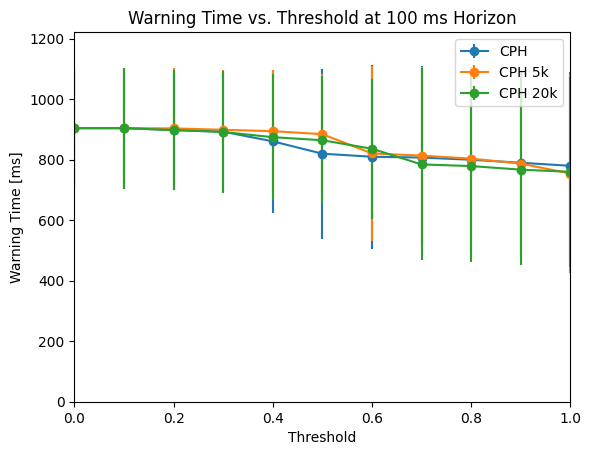

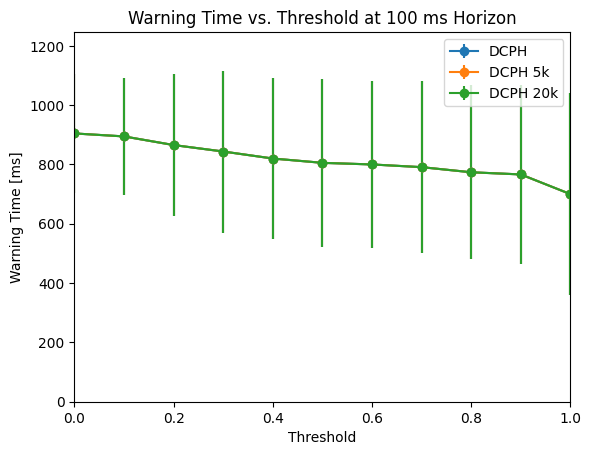

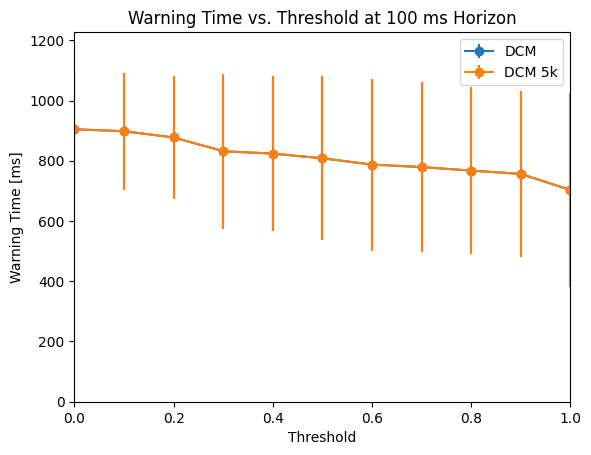

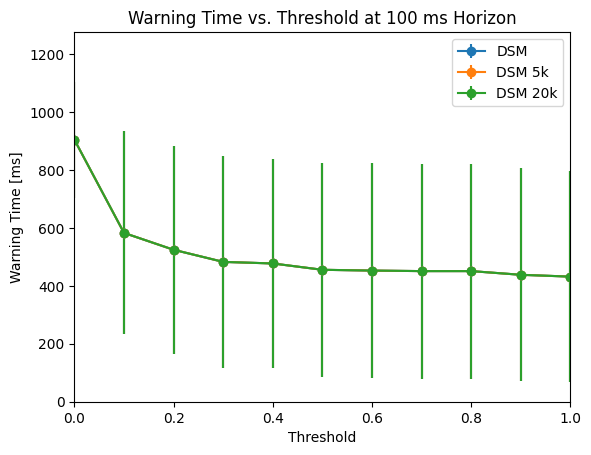

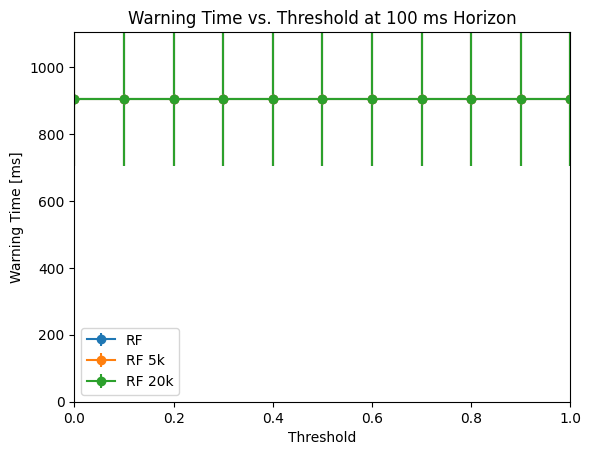

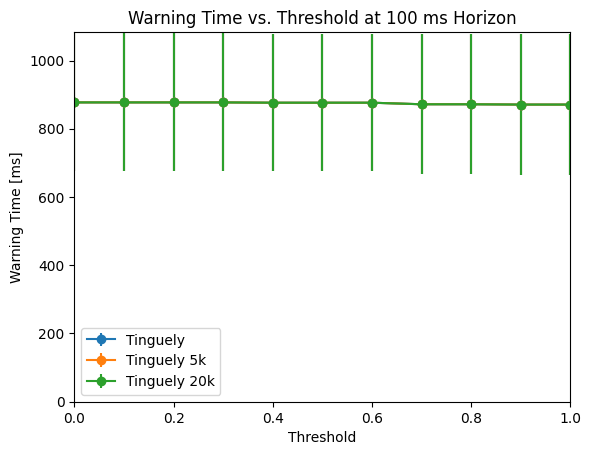

In [16]:
plot_warning_time_vs_threshold(core_experiment_list, coarse_thresholds, 0.1)
plot_warning_time_vs_threshold(cph_list, coarse_thresholds, 0.1)
plot_warning_time_vs_threshold(dcph_list, coarse_thresholds, 0.1)
plot_warning_time_vs_threshold(dcm_list, coarse_thresholds, 0.1)
plot_warning_time_vs_threshold(dsm_list, coarse_thresholds, 0.1)
plot_warning_time_vs_threshold(rf_list, coarse_thresholds, 0.1)
plot_warning_time_vs_threshold(ting_list, coarse_thresholds, 0.1)


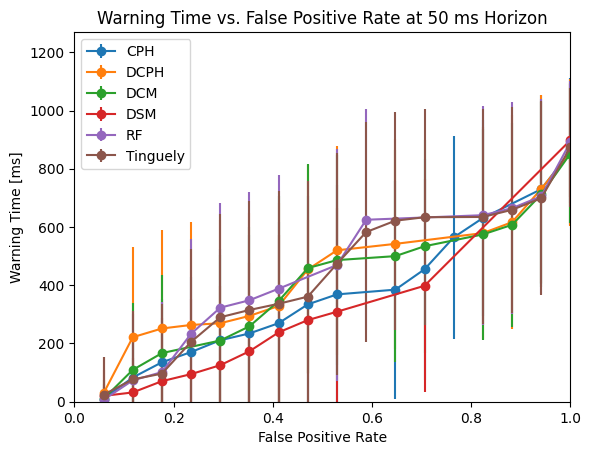

In [18]:
plot_warning_time_vs_FPR(core_experiment_list, 0.05)
#plot_warning_time_vs_FPR(cph_list, 0.05)
#plot_warning_time_vs_FPR(dcph_list, 0.05)
#plot_warning_time_vs_FPR(dcm_list, 0.05)
#plot_warning_time_vs_FPR(dsm_list, 0.05)
#plot_warning_time_vs_FPR(rf_list, 0.05)
#plot_warning_time_vs_FPR(ting_list, 0.05)


c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\Experiments.py:309: RuntimeWarning: invalid value encountered in divide
  threshold_precisions = np.sum(true_positives, axis=0) / (np.sum(true_positives, axis=0) + np.sum(false_positives, axis=0))
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\zkeith\Documents\Risk-Aware Fram

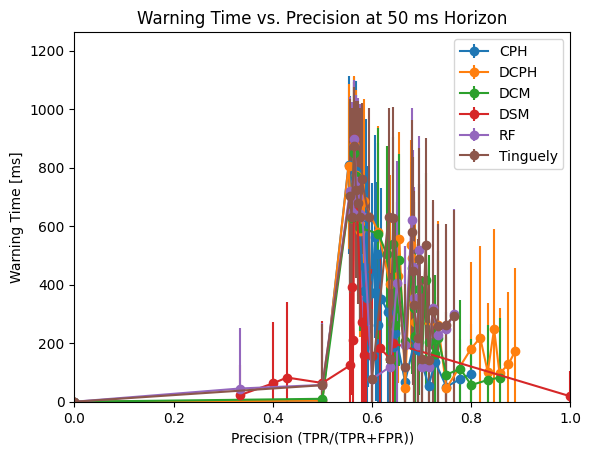

c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\Experiments.py:309: RuntimeWarning: invalid value encountered in divide
  threshold_precisions = np.sum(true_positives, axis=0) / (np.sum(true_positives, axis=0) + np.sum(false_positives, axis=0))
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\zkeith\Documents\Risk-Aware Fram

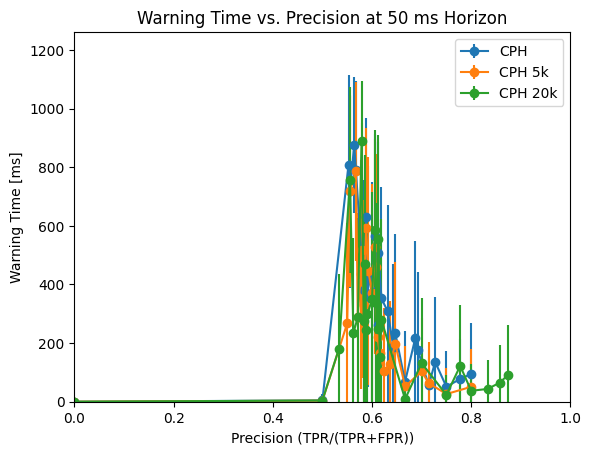

c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\Experiments.py:309: RuntimeWarning: invalid value encountered in divide
  threshold_precisions = np.sum(true_positives, axis=0) / (np.sum(true_positives, axis=0) + np.sum(false_positives, axis=0))
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\zkeith\Documents\Risk-Aware Fram

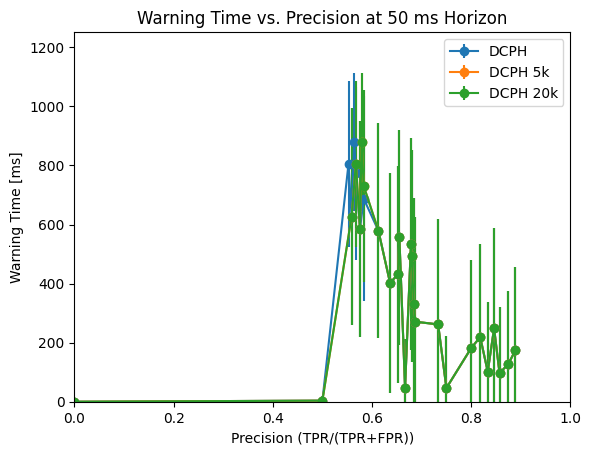

c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\Experiments.py:309: RuntimeWarning: invalid value encountered in divide
  threshold_precisions = np.sum(true_positives, axis=0) / (np.sum(true_positives, axis=0) + np.sum(false_positives, axis=0))
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\zkeith\Documents\Risk-Aware Fram

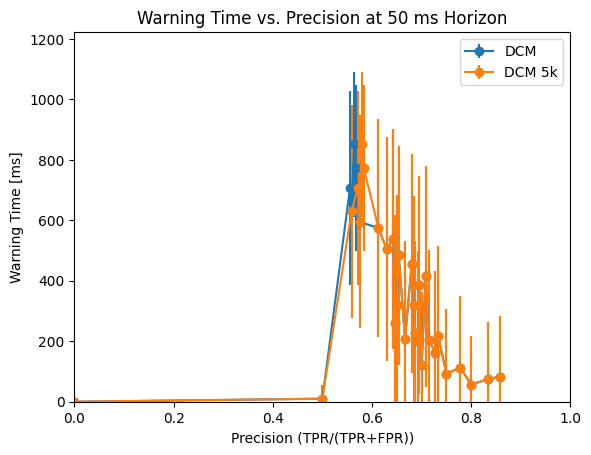

c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\Experiments.py:309: RuntimeWarning: invalid value encountered in divide
  threshold_precisions = np.sum(true_positives, axis=0) / (np.sum(true_positives, axis=0) + np.sum(false_positives, axis=0))
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\zkeith\Documents\Risk-Aware Fram

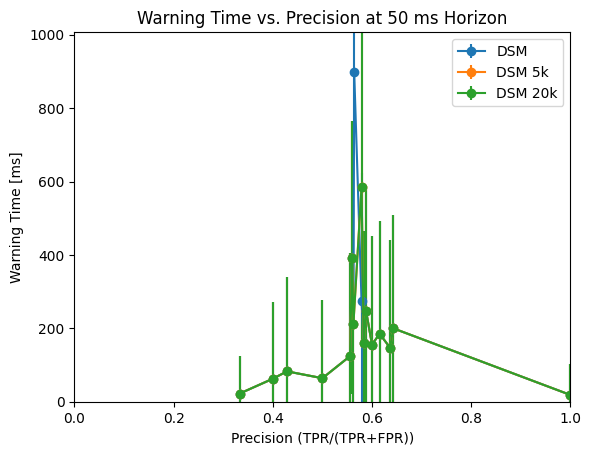

c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\Experiments.py:309: RuntimeWarning: invalid value encountered in divide
  threshold_precisions = np.sum(true_positives, axis=0) / (np.sum(true_positives, axis=0) + np.sum(false_positives, axis=0))
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\zkeith\Documents\Risk-Aware Fram

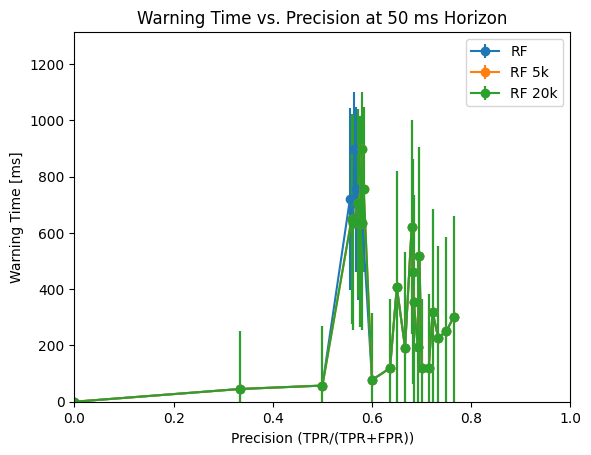

c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\Experiments.py:309: RuntimeWarning: invalid value encountered in divide
  threshold_precisions = np.sum(true_positives, axis=0) / (np.sum(true_positives, axis=0) + np.sum(false_positives, axis=0))
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\zkeith\Documents\Risk-Aware Fram

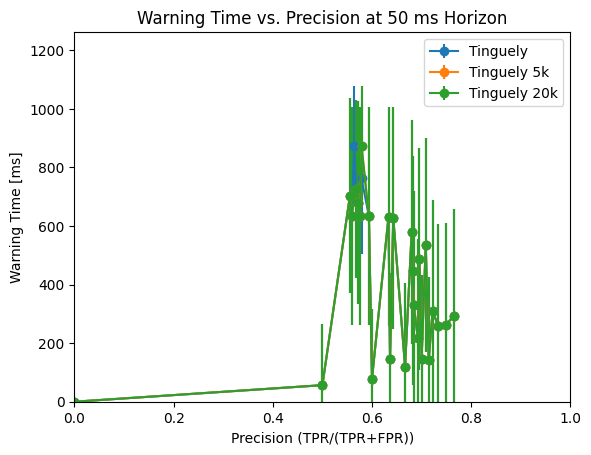

In [15]:
plot_warning_time_vs_precision(core_experiment_list, 0.05)
plot_warning_time_vs_precision(cph_list, 0.05)
plot_warning_time_vs_precision(dcph_list, 0.05)
plot_warning_time_vs_precision(dcm_list, 0.05)
plot_warning_time_vs_precision(dsm_list, 0.05)
plot_warning_time_vs_precision(rf_list, 0.05)
plot_warning_time_vs_precision(ting_list, 0.05)
